<a id=0></a>
# 10.Classification models
※　分類の機械学習モデル

---
### [1. 探索的データ分析（EDA）、スケーリング](#1)
### [2. Random Forest Classifier](#2)
### [3. KNeighbors Classifier](#3)
### [4. SVC](#4)
### [5. Logistic Regression](#5)
### [6. モデルの評価](#6)
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA)、スケーリング

* 乳がんデータセット
* 相関関係
* 分布、外れ値などの確認
* スケーリング
---

乳がんデータセット

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
breast_cancer = load_breast_cancer()

In [6]:
df_X = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df_y = pd.DataFrame(breast_cancer['target'], columns=['target'])

In [7]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.shape

(569, 31)

In [9]:
df['target'].unique()

array([0, 1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

相関関係

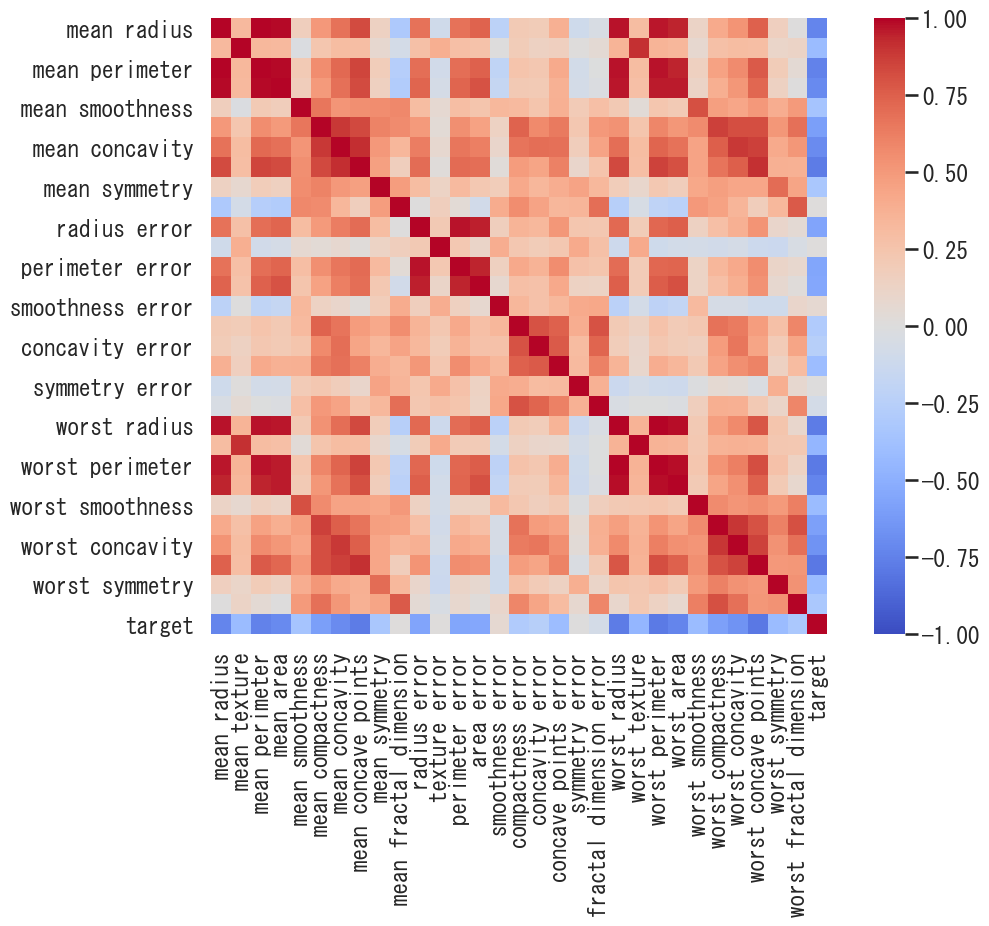

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, vmin=-1, cmap='coolwarm')
plt.show()

In [13]:
df.columns.str.contains('mean|target')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

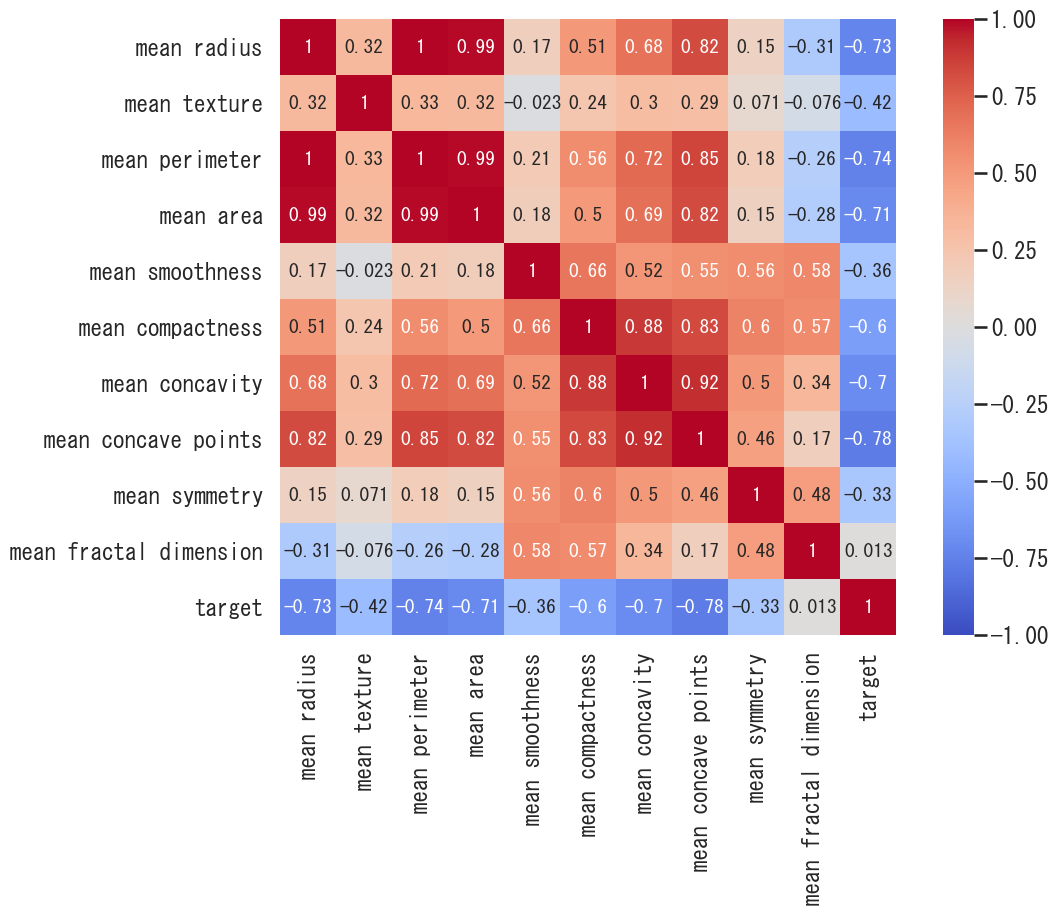

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.loc[:, df.columns.str.contains('mean|target')].corr(),
            square=True, vmin=-1, cmap='coolwarm', annot=True, annot_kws={'size':14})
plt.show()

In [15]:
df = df.loc[:, df.columns.str.contains('mean|target')]

In [16]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


分布、外れ値などの確認

In [17]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), tight_layout=True)
    sns.histplot(data=df, x=feature, hue='target', ax=axes[0])
    sns.boxplot(data=df, x='target', y=feature, width=0.8, ax=axes[1])
    sns.swarmplot(data=df, x='target', y=feature, size=3, ax=axes[2])
    plt.show()

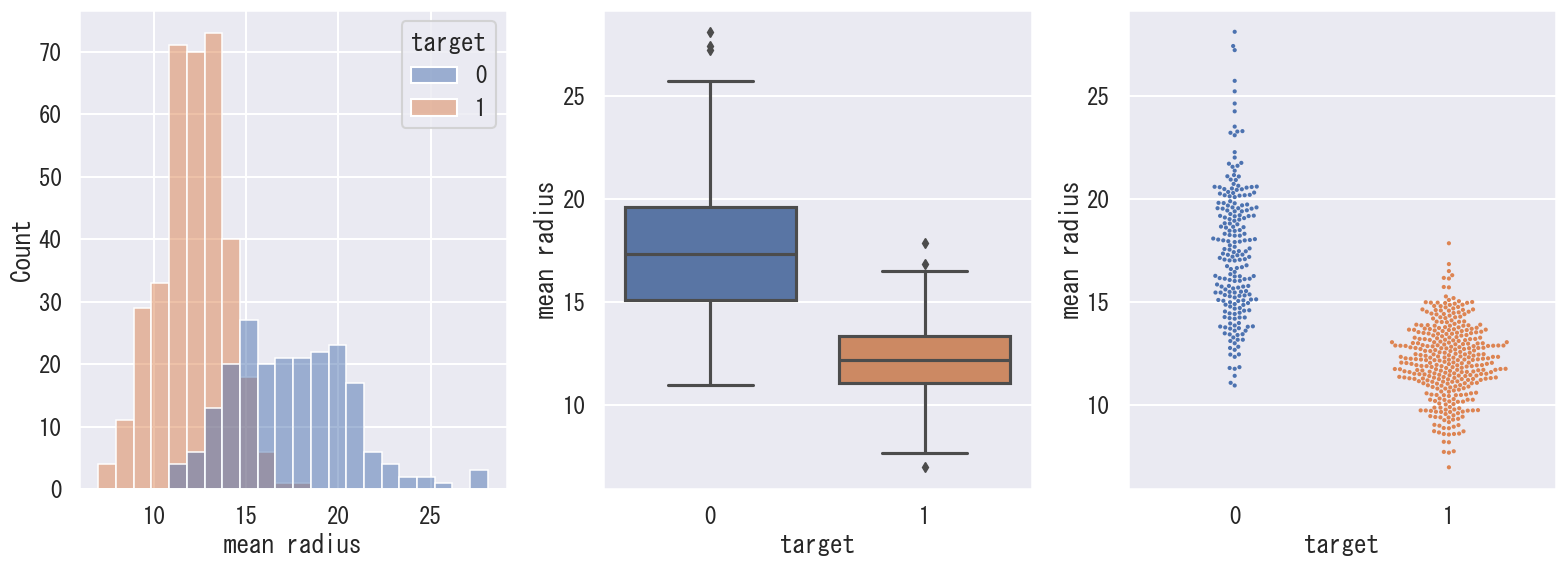

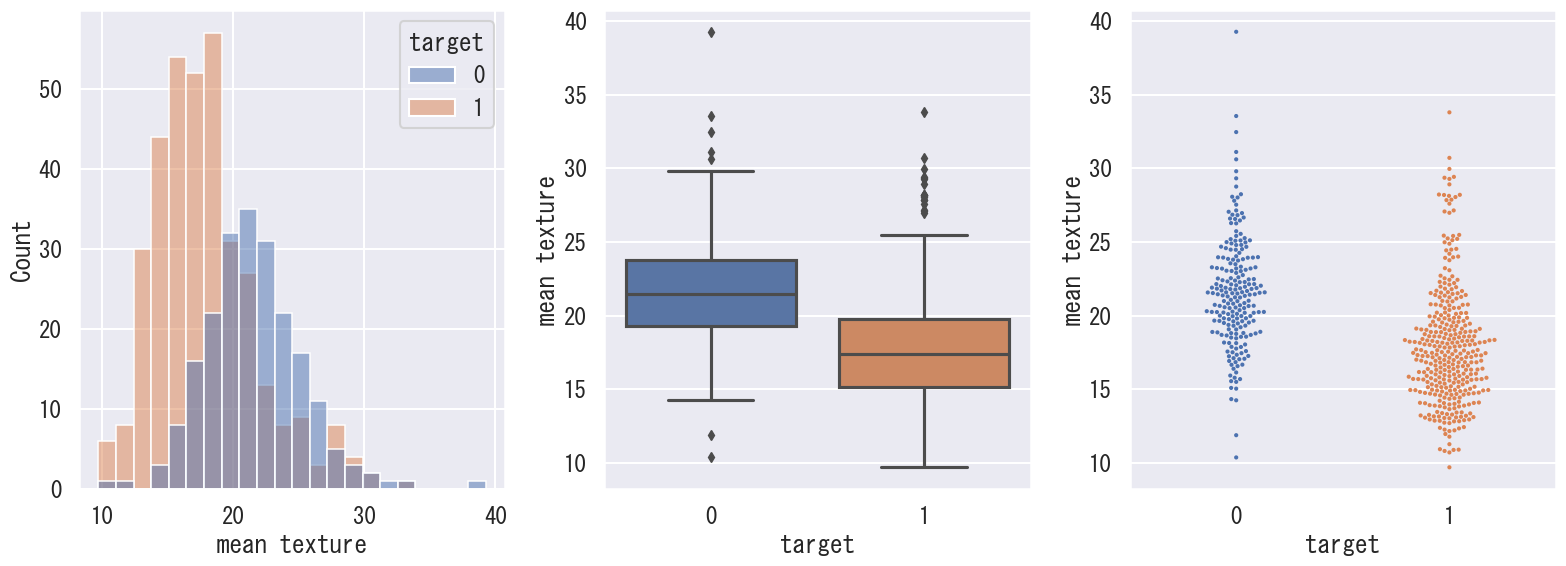

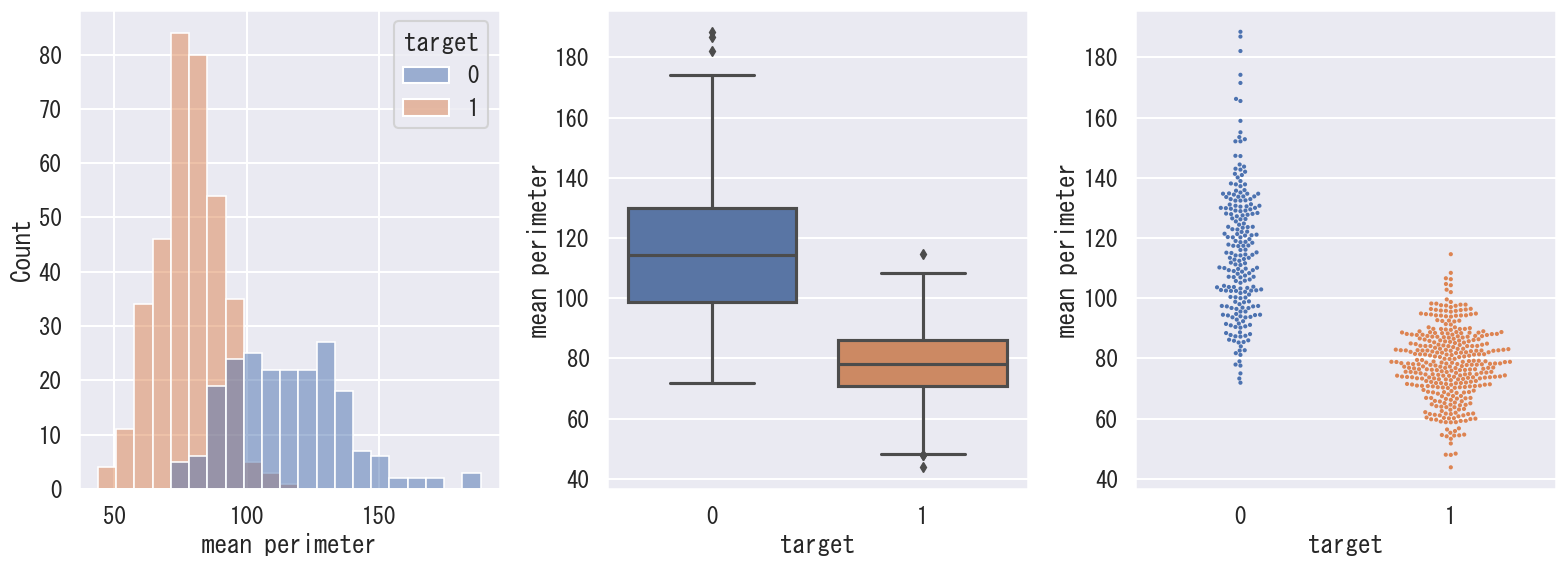

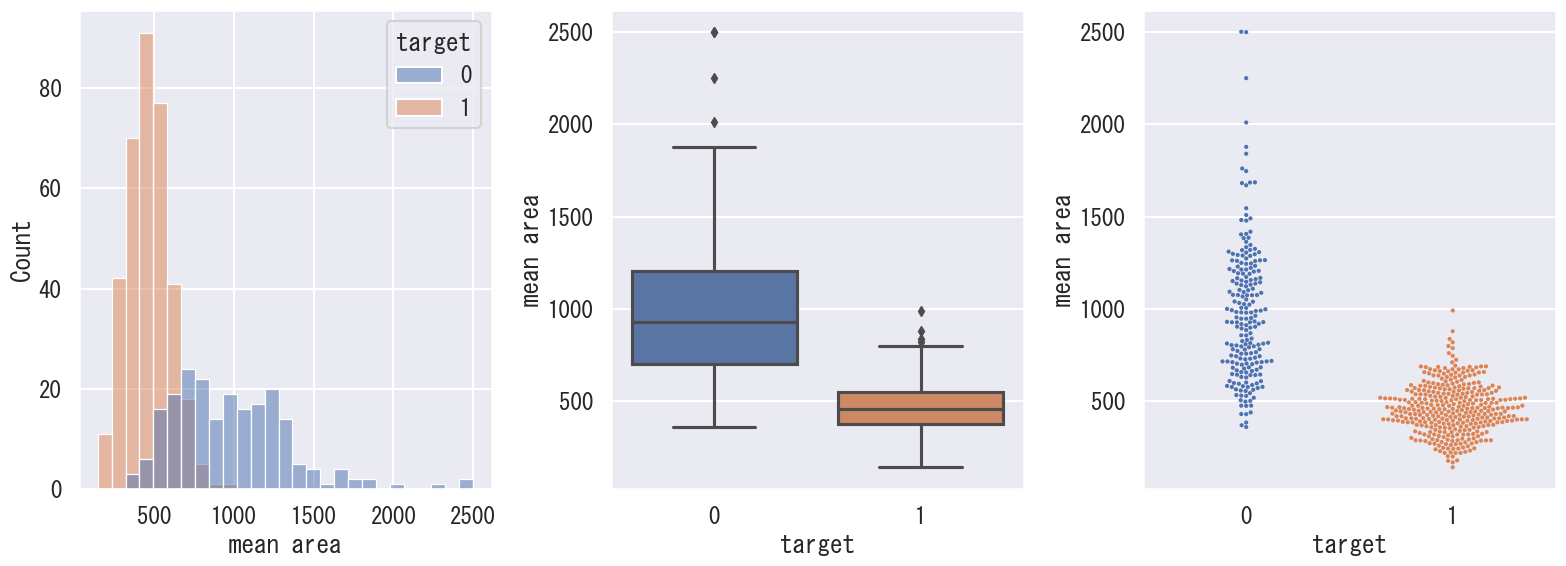

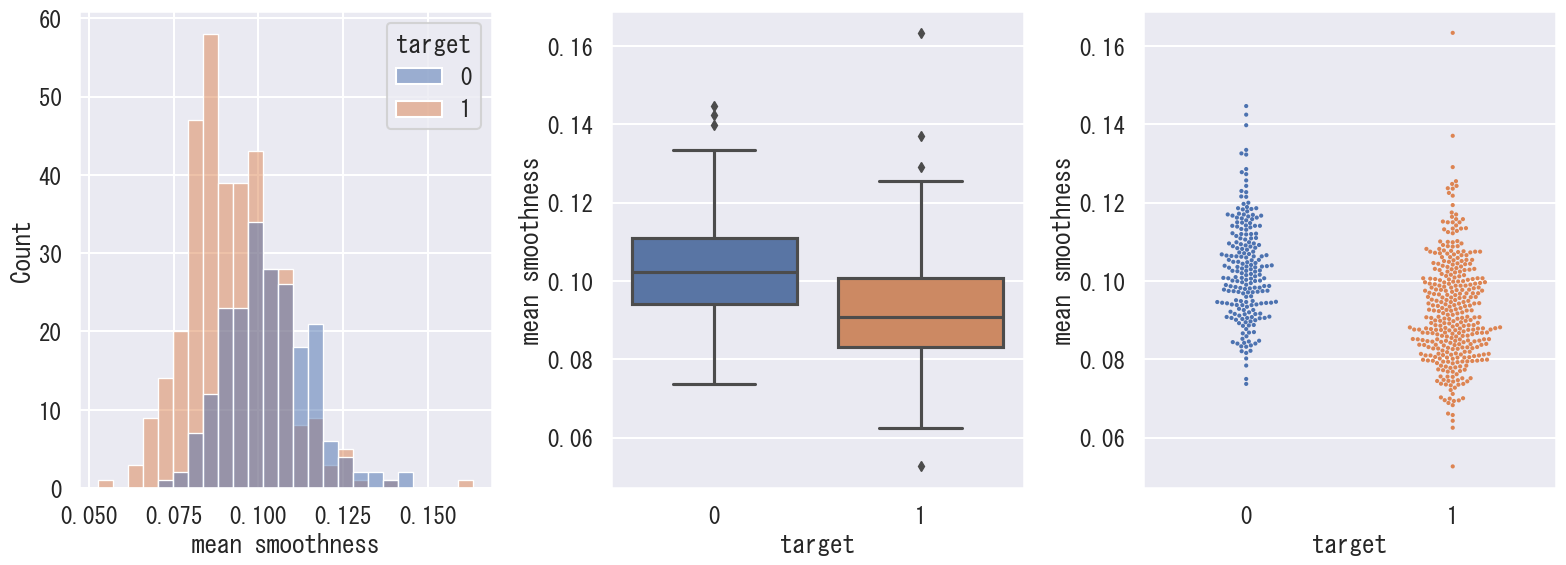

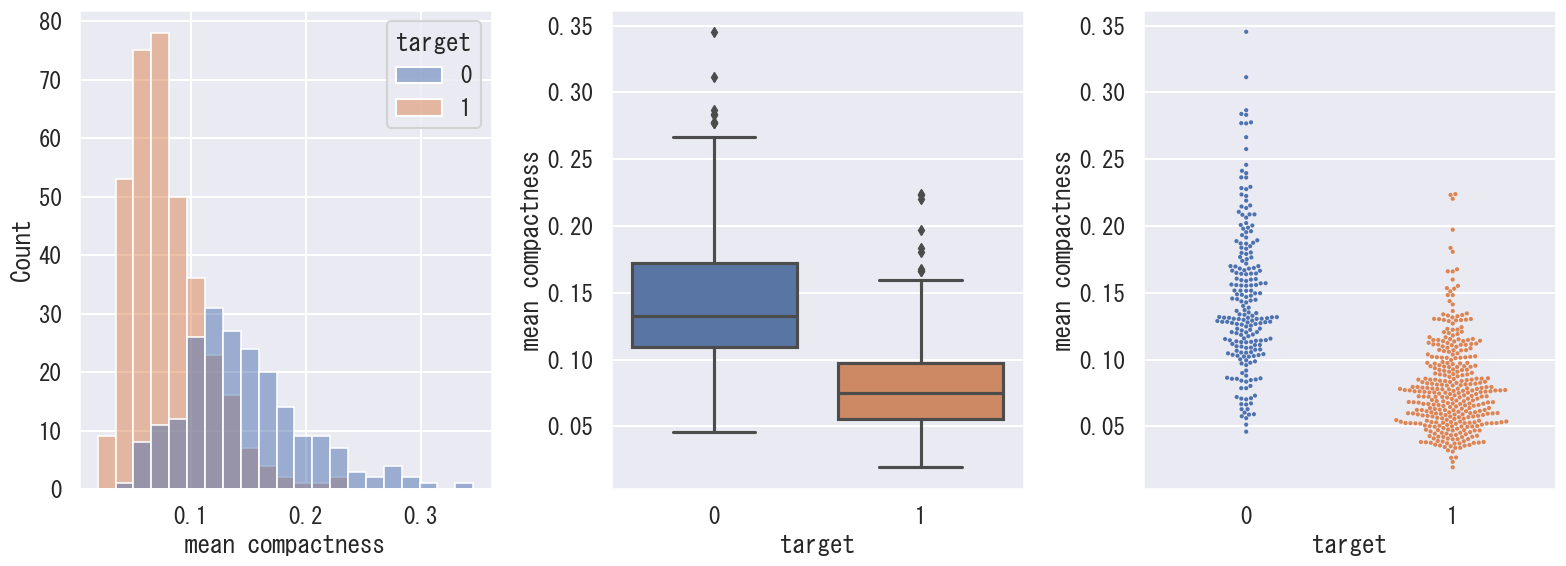

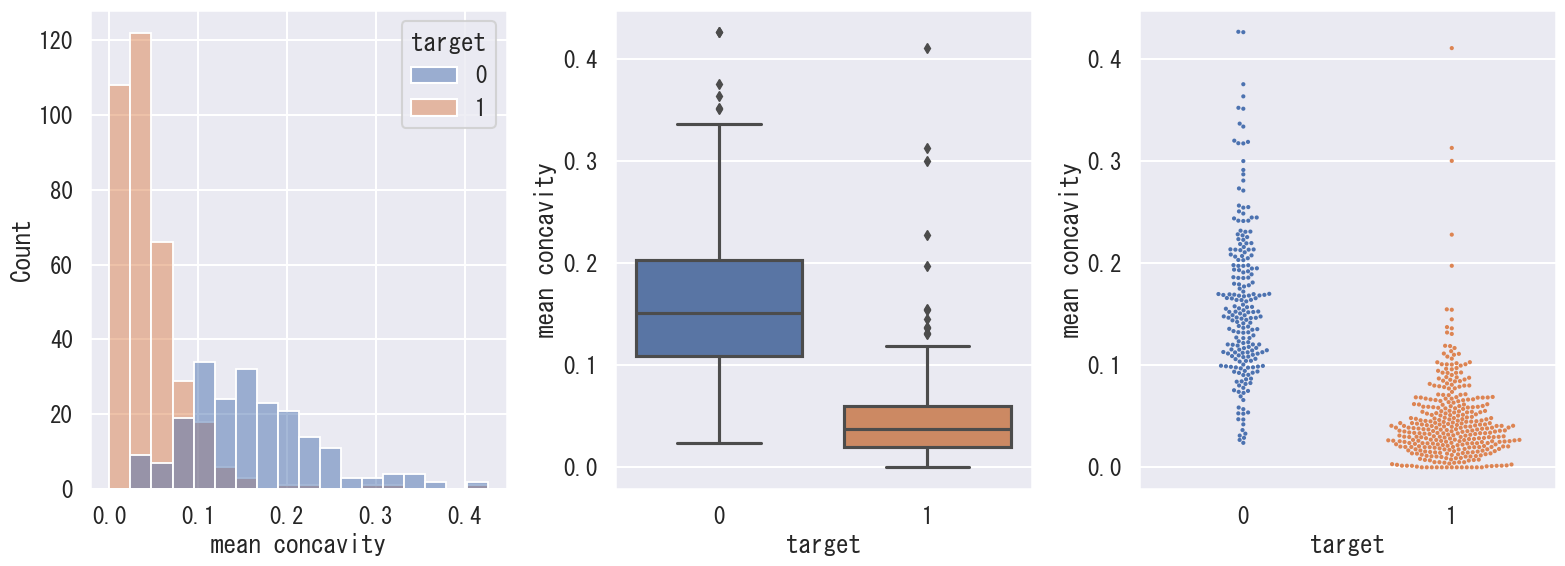

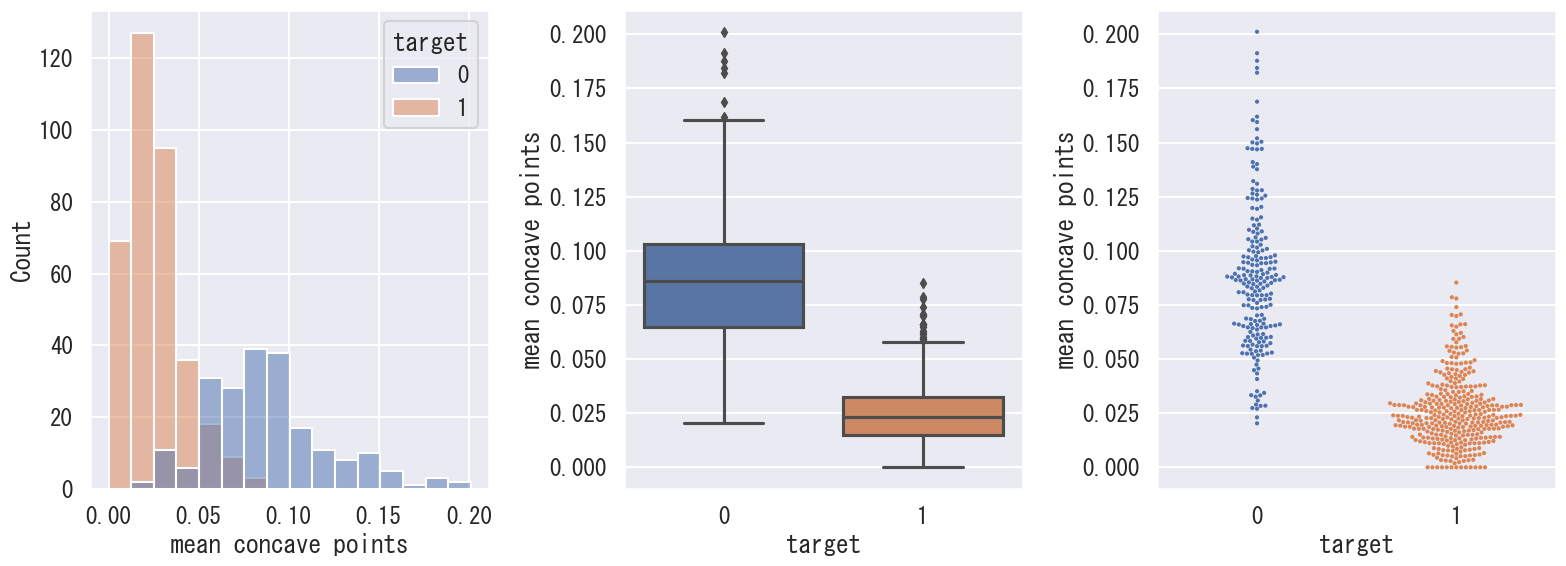

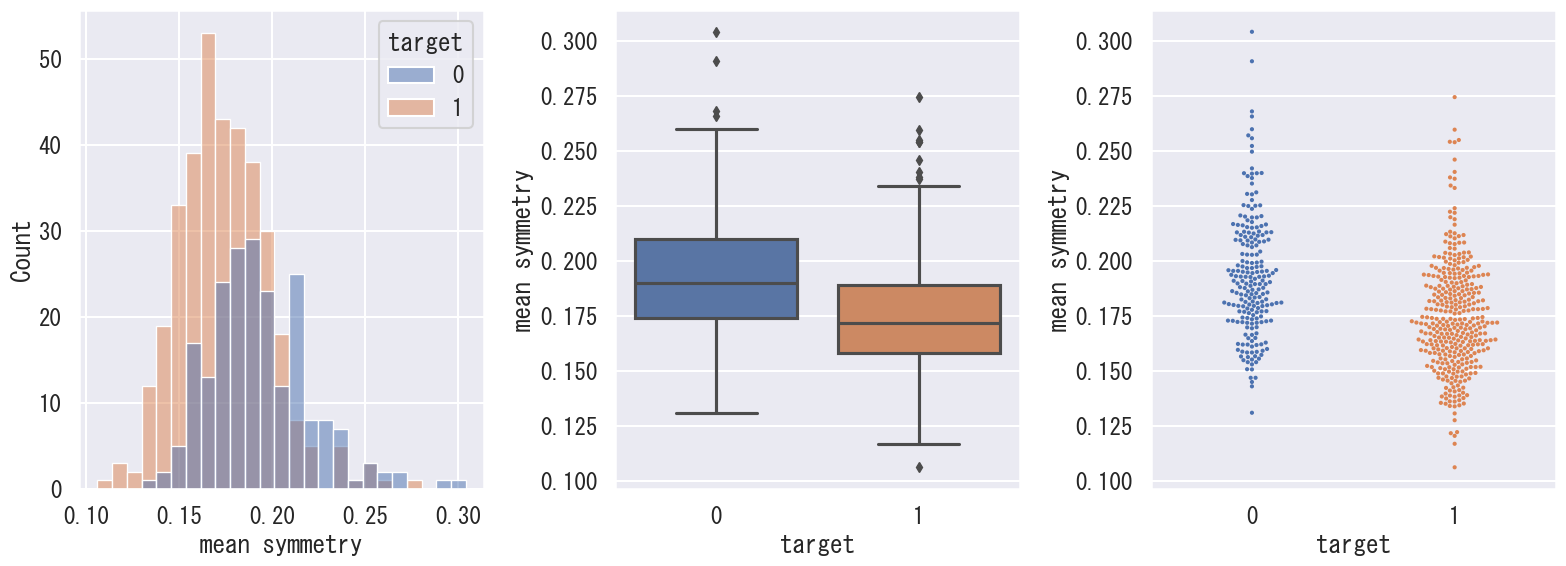

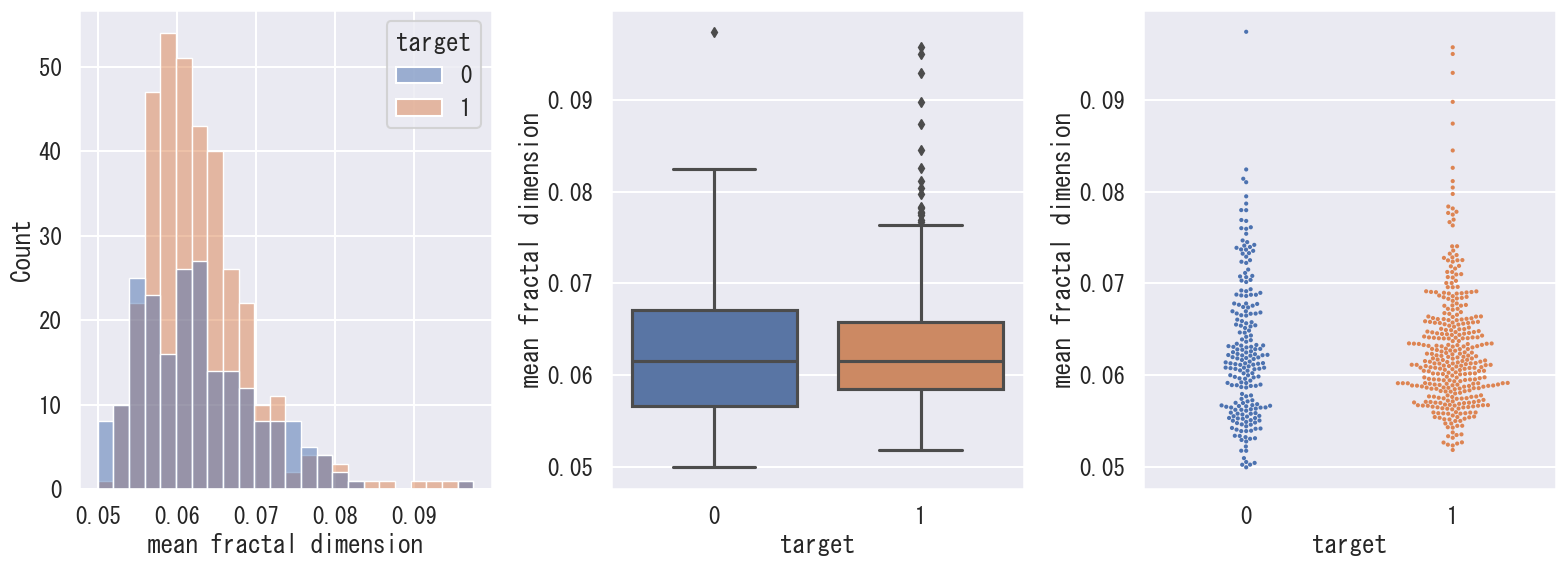

In [18]:
for feature in df.columns[:-1]:
    plot_data(feature)

スケーリング

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=17, stratify=df.iloc[:, -1])

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
sc.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = sc.transform(X_train)

In [24]:
X_test_scaled = sc.transform(X_test)

In [25]:
y_train.sum() / len(y_train), y_test.sum() / len(y_test)

(0.628140703517588, 0.6257309941520468)

---
<a id=2></a>
[Topへ](#0)

---
## 2. RandomForestClassifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 予想された確率
* confusion matrix（混同行列）
* precision（適合率）、 recall（再現率）、f1_score（F1値）
---

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_samples=None

モデルのインポート

In [26]:
from sklearn.ensemble import RandomForestClassifier

モデルインスタンスの作成

In [27]:
rf_model = RandomForestClassifier(random_state=17)

モデルの構築・属性・予測・スコア

In [28]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=17)

In [29]:
rf_pred = rf_model.predict(X_test_scaled)

In [30]:
rf_model.score(X_test_scaled, y_test)

0.9473684210526315

In [31]:
rf_model.score(X_train_scaled, y_train)

1.0

予想された確率

In [32]:
prob = rf_model.predict_proba(X_test_scaled)
prob[:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.18, 0.82],
       [0.17, 0.83],
       [1.  , 0.  ],
       [0.58, 0.42],
       [0.  , 1.  ]])

confusion matrix（混同行列）

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [34]:
confusion_matrix(y_test, rf_pred)

array([[ 60,   4],
       [  5, 102]], dtype=int64)

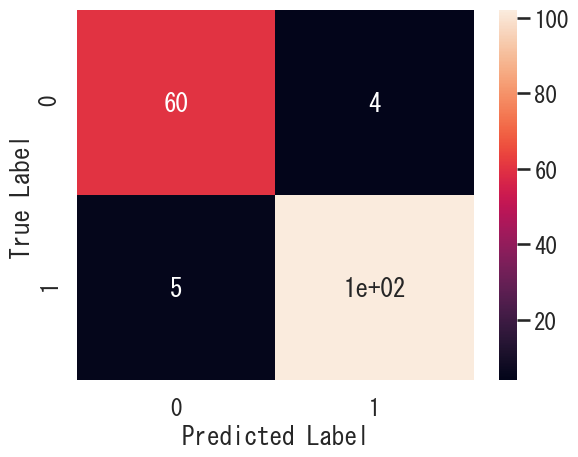

In [36]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision（適合率）、 recall（再現率）、f1_score（F1値）

In [38]:
pre = precision_score(y_test, y_pred=rf_pred)
pre

0.9622641509433962

In [40]:
rec = recall_score(y_test, rf_pred)
rec

0.9532710280373832

In [42]:
f1 = f1_score(y_test, rf_pred)
f1

0.9577464788732395

---
<a id=3></a>
[Topへ](#0)

---
## 3. KNeighbors Classifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

n_neighbors=5, weights='uniform'

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=4></a>
[Topへ](#0)

---
## 4. SVC

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, gamma='scale', random_state=None

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=5></a>
[Topへ](#0)

---
## 5. Logistic Regression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, random_state=None, max_iter=100

モデルのインポート

モデルインスタンスの作成

モデルの構築・予測・スコア

confusion matrix（混同行列）

---
<a id=6></a>
[Topへ](#0)

---
## 6. モデルの評価

* precision_recall_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html  
* f1_score, precision, recall
* roc_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.htm  
---

precision_recall_curve

f1_score, precision, recall

roc_curve

In [410]:
np.random.seed(17)
pos = np.random.randn(1000) + 1.5
neg = np.random.randn(1000) - 1.5
neg2 = np.random.randn(1000) - 7
neg3 = np.random.randn(900) + 1.5

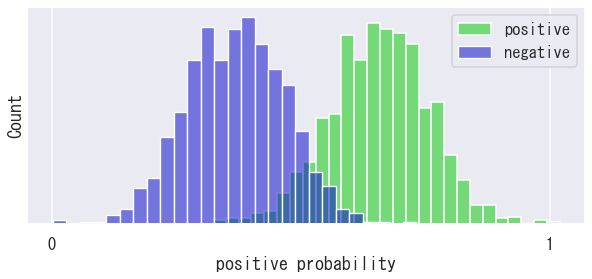

In [411]:
# あるモデルによりポジティブである確率を求めた
# 中央付近では確率が高くても実際にはネガティブ、低くてもポジティブなものが混在する
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-5.2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を中央付近にあると、バーの重なる部分が FP, FN になる

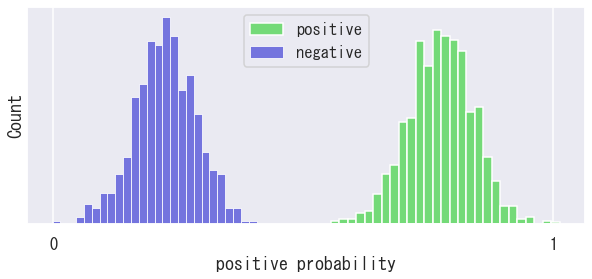

In [412]:
# このモデルでは100％の精度で分離することができている
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg2, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-10.5, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# ある閾値でははっきりと0：1に分かれる

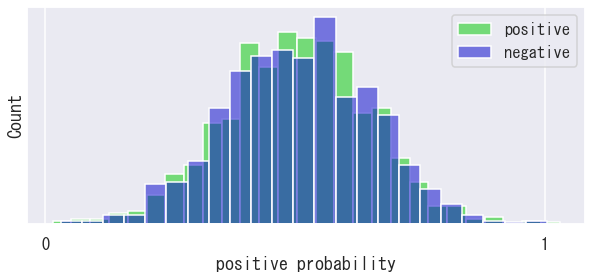

In [413]:
## ランダム（無作為）な確率をそれぞれに与える場合、どの確率においてもポジティブ、ネガティブの割合は一定
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg3, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を下げていくとTPRが上がり、同じ割合でFPRも上がっていく
# 結果として直線になると考えることができる

In [377]:
def calcurate_metrics(np, nn, tp, tn):
    fp = np - tp
    fn = nn - tn
    fpr = fp / (tn + fp)
    tpr = tp / (tp + fn)
    pre = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = 2 * pre * rec / (pre + rec)
    print(f'FPR : {fpr},  TPR : {tpr}')
    print(f'PRE : {pre},  REC : {rec}')

In [176]:
calcurate_metrics(1000, 1000, 900, 600)

FPR : 0.14285714285714285,  TPR : 0.6923076923076923
PRE : 0.9,  REC : 0.6923076923076923


In [183]:
calcurate_metrics(100, 10000, 80, 9990)

FPR : 0.001998001998001998,  TPR : 0.8888888888888888
PRE : 0.8,  REC : 0.8888888888888888


In [165]:
# fpr = fp / (tn + fp)
# tpr = tp / (tp + fn)
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
fpr, tpr, thresholds

(array([0.      , 0.      , 0.      , 0.015625, 0.03125 , 0.03125 ,
        0.03125 , 0.03125 , 0.03125 , 0.03125 , 0.03125 , 0.046875,
        0.046875, 0.0625  , 0.0625  , 0.078125, 0.09375 , 0.125   ,
        0.140625, 0.140625, 0.140625, 0.171875, 0.21875 , 0.265625,
        0.28125 , 0.3125  , 0.359375, 0.53125 , 1.      ]),
 array([0.        , 0.47663551, 0.70093458, 0.74766355, 0.80373832,
        0.81308411, 0.8317757 , 0.87850467, 0.91588785, 0.92523364,
        0.94392523, 0.94392523, 0.95327103, 0.95327103, 0.96261682,
        0.96261682, 0.97196262, 0.97196262, 0.97196262, 0.99065421,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([2.  , 1.  , 0.98, 0.97, 0.96, 0.95, 0.94, 0.83, 0.81, 0.72, 0.69,
        0.68, 0.63, 0.52, 0.47, 0.42, 0.37, 0.35, 0.29, 0.27, 0.26, 0.25,
        0.11, 0.1 , 0.06, 0.05, 0.02, 0.01, 0.  ]))

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---